Telecom X ‚Äì Parte 2: Prevendo Churn
---

## Importando o CSV

In [1]:
import pandas as pd

df = pd.read_csv('telecom_x_dados_tratados.csv')

print(df.head())

   ID_Cliente Churn     Genero  Idoso  Parceiro  Dependentes  Tempo_Contrato  \
0  0002-ORFBO    No   Feminino      0         1            1               9   
1  0003-MKNFE    No  Masculino      0         0            0               9   
2  0004-TLHLJ   Yes  Masculino      0         0            0               4   
3  0011-IGKFF   Yes  Masculino      1         1            0              13   
4  0013-EXCHZ   Yes   Feminino      1         1            0               3   

   Telefone Multiplas_Linhas Servico_Internet  ... Protecao_Dispositivo  \
0         1              N√£o              DSL  ...                  N√£o   
1         1              Sim              DSL  ...                  N√£o   
2         1              N√£o      Fiber optic  ...                  Sim   
3         1              N√£o      Fiber optic  ...                  Sim   
4         1              N√£o      Fiber optic  ...                  N√£o   

  Suporte_Tecnico Streaming_TV Streaming_Filmes        Contra

In [30]:
df_tratado.to_csv('telecom_x_dados_tratados.csv', index=False)

## **1. Prepara√ß√£o dos Dados para a Modelagem**


### Removendo Colunas que **n√£o** possuem Valores Preditivos:

In [2]:
# Remove a coluna 'ID_Cliente' do DataFrame
# O par√¢metro inplace=True modifica o DataFrame diretamente, sem precisar reatribu√≠-lo
df.drop(columns=['ID_Cliente'], inplace=True)

#Verificando se a coluna foi realmente removida
print("Colunas restantes no DataFrame:")
print(df.columns)

print("\nVisualizando as 5 primeiras linhas do DataFrame atualizado:")
print(df.head())

Colunas restantes no DataFrame:
Index(['Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Tempo_Contrato',
       'Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Gasto_Mensal', 'Gasto_Total',
       'Gasto_Medio_Mensal'],
      dtype='object')

Visualizando as 5 primeiras linhas do DataFrame atualizado:
  Churn     Genero  Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  \
0    No   Feminino      0         1            1               9         1   
1    No  Masculino      0         0            0               9         1   
2   Yes  Masculino      0         0            0               4         1   
3   Yes  Masculino      1         1            0              13         1   
4   Yes   Feminino      1         1            0               3         1   

  Multiplas_Linhas Servico_In

### **Encoding - Transformando Vari√°veis Categ√≥ricas em Num√©ricas:**

**Passo 1:** Convertendo a vari√°vel alvo 'Churn'

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verificando a transforma√ß√£o
print("Valores da coluna Churn ap√≥s a convers√£o:")
print(df['Churn'].value_counts())

Valores da coluna Churn ap√≥s a convers√£o:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [4]:
df['Churn'].head()

0    0
1    0
2    1
3    1
4    1
Name: Churn, dtype: int64

**Passo 2:** Aplicar o One-Hot Encoding nas outras vari√°veis

In [6]:
import pandas as pd

# Identifica as colunas categ√≥ricas que precisam de encoding
# (Exclui a coluna 'Churn' que j√° foi tratada)
colunas_para_codificar = df.select_dtypes(include=['object']).columns

print("Colunas que ser√£o transformadas:", list(colunas_para_codificar))

# Aplicando o one-hot encoding
df_tratado = pd.get_dummies(df, columns=colunas_para_codificar, drop_first=True)

# Visualizando o novo DataFrame
print("\nDimens√µes do DataFrame antes do encoding:", df.shape)
print("Dimens√µes do DataFrame depois do encoding:", df_tratado.shape)

print("\nVisualizando as 5 primeiras linhas do DataFrame final:")
pd.set_option('display.max_columns', None) # Para garantir que todas as novas colunas sejam exibidas
print(df_tratado.head())

# Verificando os tipos de dados para confirmar que n√£o h√° mais colunas 'object'
print("\nInforma√ß√µes do novo DataFrame:")
df_tratado.info()

Colunas que ser√£o transformadas: ['Genero', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Metodo_Pagamento']

Dimens√µes do DataFrame antes do encoding: (7043, 21)
Dimens√µes do DataFrame depois do encoding: (7043, 32)

Visualizando as 5 primeiras linhas do DataFrame final:
   Churn  Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  \
0      0      0         1            1               9         1   
1      0      0         0            0               9         1   
2      1      0         0            0               4         1   
3      1      1         1            0              13         1   
4      1      1         1            0               3         1   

   Fatura_Digital  Gasto_Mensal  Gasto_Total  Gasto_Medio_Mensal  \
0               1          65.6       593.30           65.922222   
1               0          59.9       542.40           6

**Passo 3:** Removendo valores nulos e convertentendo Bool para Int:

In [7]:
# --- Passo 1: Tratar os valores nulos ---
# Vamos preencher os valores ausentes com a mediana de cada coluna respectiva
mediana_gasto_total = df_tratado['Gasto_Total'].median()
mediana_gasto_medio = df_tratado['Gasto_Medio_Mensal'].median()

df_tratado['Gasto_Total'].fillna(mediana_gasto_total, inplace=True)
df_tratado['Gasto_Medio_Mensal'].fillna(mediana_gasto_medio, inplace=True)

print("Valores ausentes em 'Gasto_Total' ap√≥s tratamento:", df_tratado['Gasto_Total'].isnull().sum())
print("Valores ausentes em 'Gasto_Medio_Mensal' ap√≥s tratamento:", df_tratado['Gasto_Medio_Mensal'].isnull().sum())


# --- Passo 2: Converter colunas booleanas para inteiros ---
# Seleciona todas as colunas que s√£o do tipo 'bool'
colunas_bool = df_tratado.select_dtypes(include=['bool']).columns

# Converte essas colunas para o tipo 'int' (True vira 1, False vira 0)
for col in colunas_bool:
    df_tratado[col] = df_tratado[col].astype(int)

print("\n--- Informa√ß√µes do DataFrame ap√≥s a limpeza final ---")
df_tratado.info()

print("\n--- Visualizando o resultado final ---")
print(df_tratado.head())

Valores ausentes em 'Gasto_Total' ap√≥s tratamento: 0
Valores ausentes em 'Gasto_Medio_Mensal' ap√≥s tratamento: 0

--- Informa√ß√µes do DataFrame ap√≥s a limpeza final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   int64  
 1   Idoso                                     7043 non-null   int64  
 2   Parceiro                                  7043 non-null   int64  
 3   Dependentes                               7043 non-null   int64  
 4   Tempo_Contrato                            7043 non-null   int64  
 5   Telefone                                  7043 non-null   int64  
 6   Fatura_Digital                            7043 non-null   int64  
 7   Gasto_Mensal                              7043 non-null   float64
 8   Gasto

/tmp/ipython-input-1441014282.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Gasto_Total'].fillna(mediana_gasto_total, inplace=True)
/tmp/ipython-input-1441014282.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

## Verifica√ß√£o da Propor√ß√£o de Evas√£o

/tmp/ipython-input-2054678702.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Status do Cliente', data=df_plot, palette=['#5cb85c', '#337ab7'],


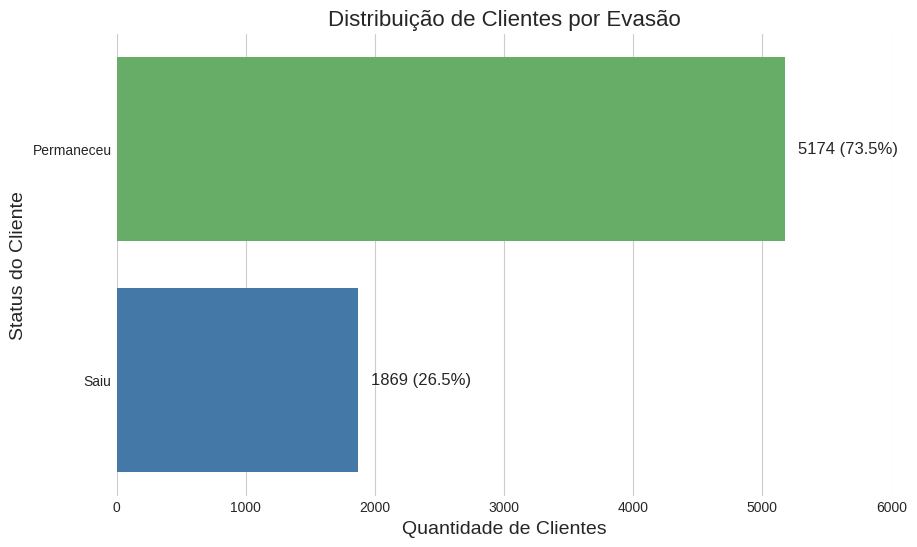

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_tratado.copy()

# --- Prepara√ß√£o para o Gr√°fico ---
# Para facilitar a plotagem, podemos mapear os n√∫meros de volta para os textos
# Isso ajuda o Seaborn a criar as legendas corretas automaticamente.
df_plot['Status do Cliente'] = df_plot['Churn'].map({0: 'Permaneceu', 1: 'Saiu'})

# Define o estilo do gr√°fico para ficar parecido com o seu
plt.style.use('seaborn-v0_8-whitegrid') # ou 'fivethirtyeight' que √© bem parecido com o seu

# --- Cria√ß√£o do Gr√°fico ---
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Status do Cliente', data=df_plot, palette=['#5cb85c', '#337ab7'],
                   order=['Permaneceu', 'Saiu']) # Garante a ordem das barras

# --- Adicionando os R√≥tulos (Contagem e Porcentagem) ---
total = len(df_plot)
for p in ax.patches:
    # Pega a largura da barra (que √© a contagem)
    width = p.get_width()
    # Calcula a porcentagem
    percentage = f'({100 * width / total:.1f}%)'
    # Define a posi√ß√£o do texto
    x = p.get_x() + width + 100 # Posi√ß√£o X (um pouco depois da barra)
    y = p.get_y() + p.get_height() / 2. # Posi√ß√£o Y (centralizada na altura da barra)
    # Adiciona o texto ao gr√°fico
    ax.text(x, y, f'{int(width)} {percentage}', va='center', fontsize=12)

# --- Finaliza√ß√£o e Customiza√ß√£o ---
ax.set_title('Distribui√ß√£o de Clientes por Evas√£o', fontsize=16)
ax.set_xlabel('Quantidade de Clientes', fontsize=14)
ax.set_ylabel('Status do Cliente', fontsize=14)
ax.set_xlim(0, 6000) # Ajusta o limite do eixo X para dar espa√ßo aos r√≥tulos

# Remove as bordas desnecess√°rias para um visual mais limpo
sns.despine(left=True, bottom=True)

plt.show()

## Balanceamento de dados:

Instalando a biblioteca 'imbalanced-learn':

In [12]:
!pip install imbalanced-learn

Aplicando o balanceamento **SMOTE** **apenas** no conjunto de **treino**:

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separando as vari√°veis preditoras (X) da vari√°vel alvo (y) ---
X = df_tratado.drop('Churn', axis=1)
y = df_tratado['Churn']

# Dividindo os dados em treino e teste ANTES de balancear ---
# O conjunto de teste (X_test, y_test) permanecer√° desbalanceado, como no mundo real.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Propor√ß√£o de Churn ANTES do SMOTE (no treino):")
print(y_train.value_counts(normalize=True))
print("-" * 50)


# Aplicando o SMOTE APENAS nos dados de treino ---
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Verificando o resultado do balanceamento ---
print("Propor√ß√£o de Churn DEPOIS do SMOTE (no treino):")
print(y_train_balanced.value_counts(normalize=True))
print("-" * 50)

print("Dimens√µes de X_train antes do SMOTE:", X_train.shape)
print("Dimens√µes de X_train depois do SMOTE:", X_train_balanced.shape)

Propor√ß√£o de Churn ANTES do SMOTE (no treino):
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
--------------------------------------------------
Propor√ß√£o de Churn DEPOIS do SMOTE (no treino):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
--------------------------------------------------
Dimens√µes de X_train antes do SMOTE: (4930, 31)
Dimens√µes de X_train depois do SMOTE: (7244, 31)


Padroniza√ß√£o (Standardization) dos Dados:

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Agora com dados j√° est√£o divididos e balanceados da etapa anterior:
# X_train_balanced, y_train_balanced
# X_test, y_test

# 1. Inicializando o Scaler
scaler = StandardScaler()

# 2. Ajustando o scaler APENAS nos dados de treino e transform√°-los
# Usamos fit_transform() como um atalho para ajustar e transformar de uma vez
X_train_scaled = scaler.fit_transform(X_train_balanced)

# 3. Usando o scaler J√Å AJUSTADO para transformar os dados de teste
# Note que aqui usamos apenas transform(), n√£o fit_transform()
X_test_scaled = scaler.transform(X_test)

# --- Verificando (Opcional, mas muito √∫til para entender) ---

# O resultado do scaler √© um array NumPy. Para facilitar a visualiza√ß√£o,
# convertemos de volta para um DataFrame.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_balanced.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("--- Dados de Treino Padronizados (5 primeiras linhas) ---")
print(X_train_scaled_df.head())
print("\n--- M√©dia de cada coluna nos dados de treino (deve ser pr√≥xima de 0) ---")
print(X_train_scaled_df.mean().head())
print("\n--- Desvio Padr√£o de cada coluna nos dados de treino (deve ser pr√≥ximo de 1) ---")
print(X_train_scaled_df.std().head())

--- Dados de Treino Padronizados (5 primeiras linhas) ---
      Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  Fatura_Digital  \
0 -0.392264 -0.767882    -0.525382       -0.562234  0.328867       -1.239164   
1 -0.392264 -0.767882    -0.525382       -0.938364  0.328867        0.806996   
2 -0.392264  1.302284    -0.525382        0.315403  0.328867        0.806996   
3 -0.392264  1.302284    -0.525382        1.276625  0.328867        0.806996   
4 -0.392264 -0.767882    -0.525382       -1.063741  0.328867        0.806996   

   Gasto_Mensal  Gasto_Total  Gasto_Medio_Mensal  Genero_Masculino  \
0      0.290200    -0.422420            0.403326          1.146463   
1      0.065481    -0.775810            0.044091          1.146463   
2      0.246650     0.246894            0.187359          1.146463   
3      0.626408     1.308830            0.559381          1.146463   
4     -0.645260    -0.882586           -0.377128         -0.872248   

   Multiplas_Linhas_N√£o possui servi√ßo

Resumo:

- scaler = StandardScaler(): Criamos um objeto que sabe como padronizar dados.
- scaler.fit_transform(X_train_balanced): O scaler olhou para - X_train_balanced, calculou a m√©dia e o desvio padr√£o de cada
uma das 31 colunas, e usou esses valores para transformar os dados.
- scaler.transform(X_test): O scaler usou as m√©dias e desvios padr√£o que ele aprendeu do conjunto de treino para transformar o conjunto de teste. Isso garante que os dois conjuntos de dados sejam padronizados exatamente da mesma maneira.

- Dados de Treino: X_train_scaled e y_train_balanced (balanceados e padronizados).
- Dados de Teste: X_test_scaled e y_test (desbalanceados como na vida real, mas padronizados da mesma forma que o treino).

---
# Correla√ß√£o e Sele√ß√£o de Vari√°veis

### **Objetivo: Quais vari√°veis t√™m a maior correla√ß√£o (positiva ou negativa) com a vari√°vel Churn?**

## An√°lise de Correla√ß√£o:

--- Principais Vari√°veis Correlacionadas com o Churn ---
Servico_Internet_Fiber optic                0.319040
Gasto_Mensal                                0.221378
Gasto_Medio_Mensal                          0.220338
Metodo_Pagamento_Electronic check           0.206322
Fatura_Digital                              0.130780
Idoso                                       0.017055
Streaming_TV_Sim                           -0.014372
Telefone                                   -0.020932
Streaming_Filmes_Sim                       -0.037742
Multiplas_Linhas_Sim                       -0.060739
Multiplas_Linhas_N√£o possui servi√ßo        -0.069385
Genero_Masculino                           -0.167761
Metodo_Pagamento_Mailed check              -0.176674
Protecao_Dispositivo_Sim                   -0.204758
Backup_Online_Sim                          -0.228271
Gasto_Total                                -0.254967
Metodo_Pagamento_Credit card (automatic)   -0.266132
Backup_Online_N√£o possui servi√ßo     

/tmp/ipython-input-361784811.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_com_churn.values, y=corr_com_churn.index, palette='vlag')


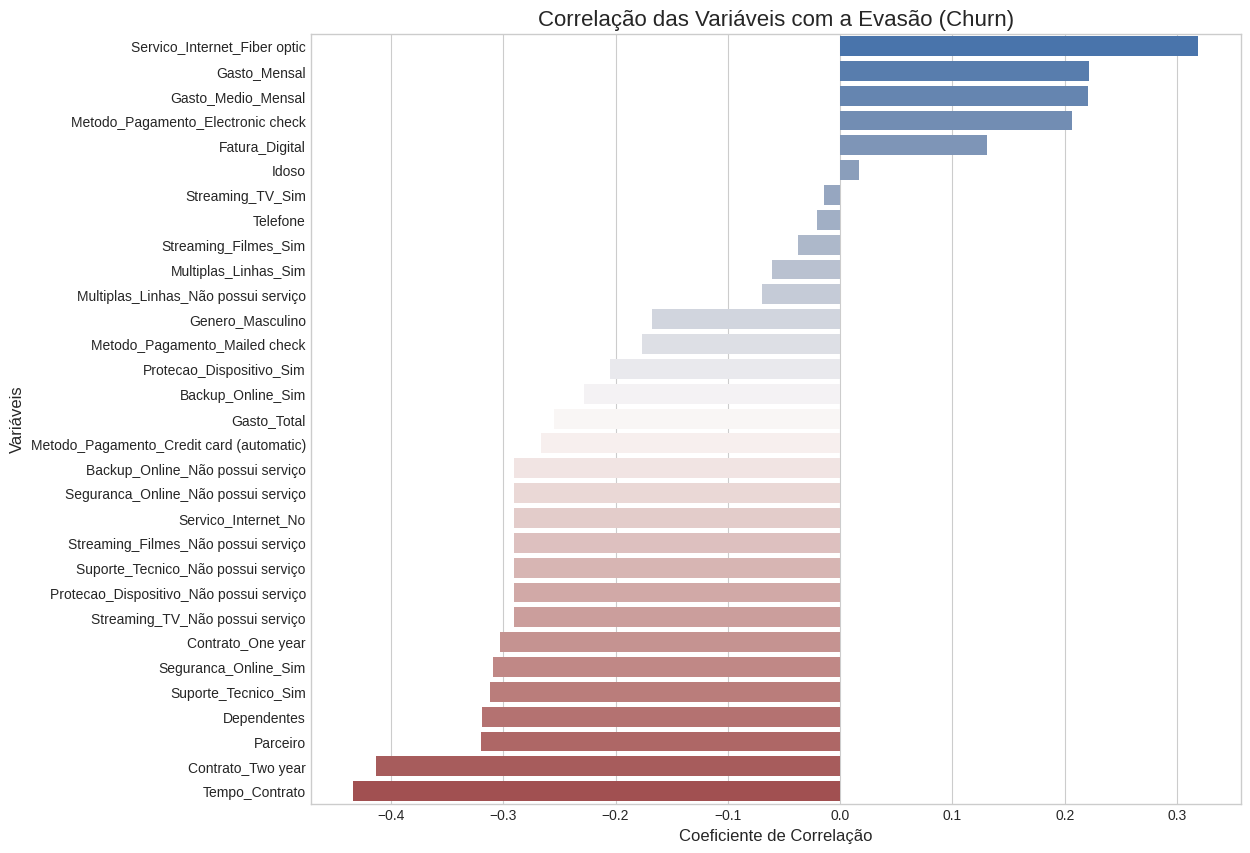

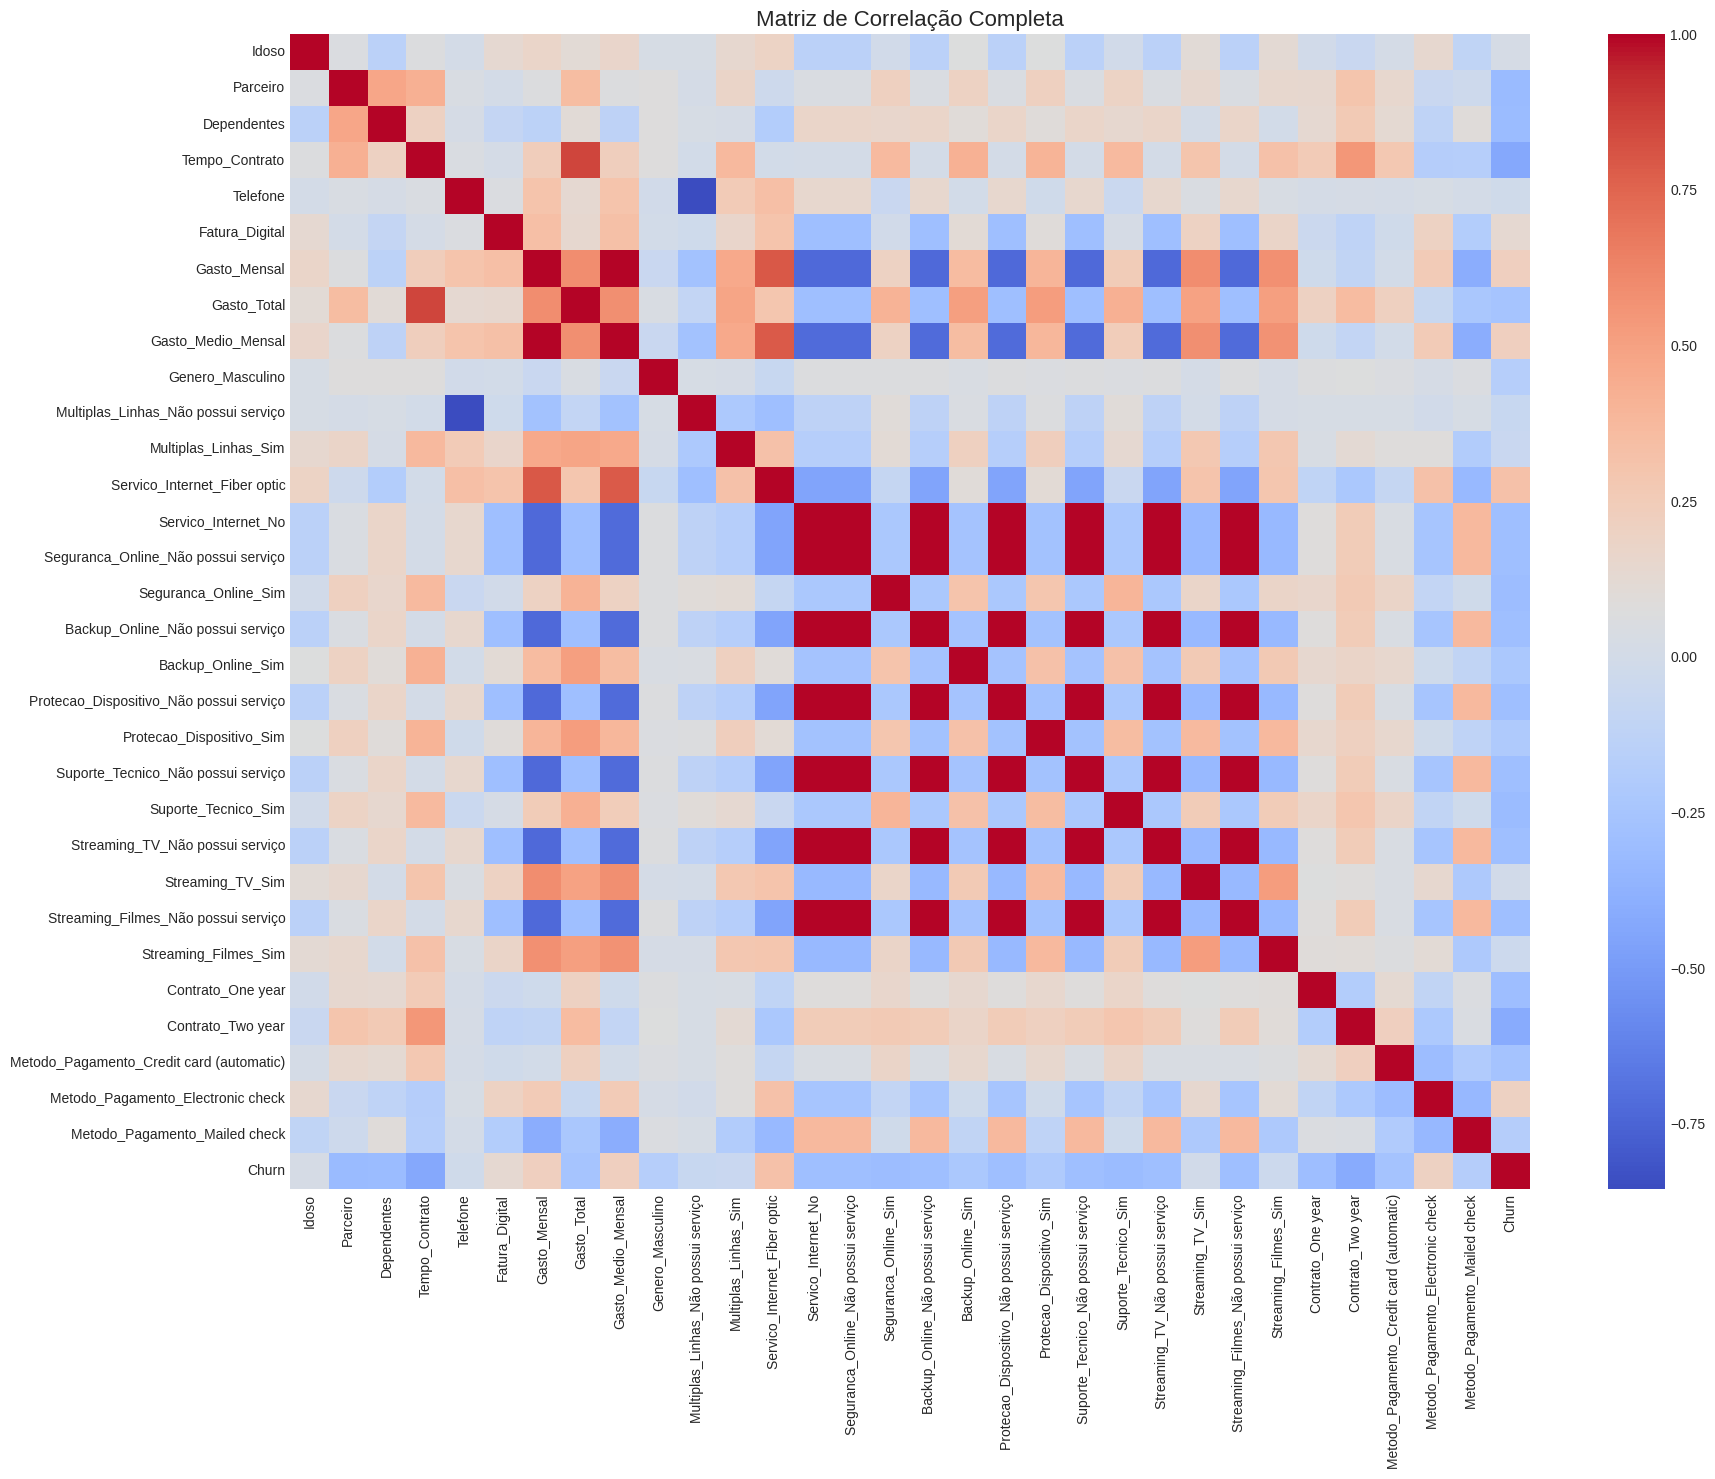

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Recombinando os dados de treino para an√°lise ---
# Lembre-se que X_train_scaled √© um array NumPy, ent√£o vamos usar o DataFrame que criamos para verifica√ß√£o.
# O y_train_balanced precisa ter seu √≠ndice resetado para concatenar corretamente.
df_analise = pd.concat([X_train_scaled_df, y_train_balanced.reset_index(drop=True)], axis=1)

# 2. Calculando a matriz de correla√ß√£o completa ---
matriz_correlacao = df_analise.corr()

# 3. Isolando e ordenar as correla√ß√µes com a vari√°vel 'Churn' ---
# Isso nos dar√° a vis√£o mais importante e direta.
corr_com_churn = matriz_correlacao['Churn'].drop('Churn').sort_values(ascending=False)

print("--- Principais Vari√°veis Correlacionadas com o Churn ---")
print(corr_com_churn)

# 4. Visualizando essas correla√ß√µes em um gr√°fico de barras ---
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_com_churn.values, y=corr_com_churn.index, palette='vlag')
plt.title('Correla√ß√£o das Vari√°veis com a Evas√£o (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correla√ß√£o', fontsize=12)
plt.ylabel('Vari√°veis', fontsize=12)
plt.show()


# 5. Visualizando a Matriz de Correla√ß√£o Completa ---
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacao, cmap='coolwarm', annot=False) # annot=False para n√£o poluir com n√∫meros
plt.title('Matriz de Correla√ß√£o Completa', fontsize=16)
plt.show()

## An√°lise dos Resultados de Correla√ß√£o

- Fatores que **aumentam** a Chance de Churn (Correla√ß√£o Positiva üö©):

**1.  Servico_Internet_Fiber optic (Correla√ß√£o: 0.32):**

Este √© o fator com a **correla√ß√£o positiva mais forte.** Isso pode parecer contraintuitivo, afinal, fibra √≥ptica √© um servi√ßo premium. A hip√≥tese aqui n√£o √© que a fibra seja ruim, mas talvez que seja **mais cara**, atraindo clientes mais sens√≠veis a pre√ßo, ou que a **concorr√™ncia por fibra seja mais acirrada, facilitando a troca de provedor**.

--------------------------------------------------

**2. Gasto_Mensal / Gasto_Medio_Mensal (Correla√ß√£o: ~0.22):**

Rela√ß√£o direta e esperada. Quanto maior a conta mensal, maior a probabilidade do cliente cancelar. Isso refor√ßa a hip√≥tese do pre√ßo.

---------------------------------------------------

**3. Metodo_Pagamento_Electronic check (Correla√ß√£o: 0.21):**

Clientes que usam cheque eletr√¥nico s√£o mais propensos a sair. Isso pode indicar um **perfil de cliente com menos "v√≠nculo" com a empresa**, j√° que n√£o √© um m√©todo de pagamento autom√°tico e recorrente como o cart√£o de cr√©dito.

---------------------------------------------------

**4. Fatura_Digital (Correla√ß√£o: 0.13):**

Uma correla√ß√£o mais fraca, mas presente. Clientes com fatura digital podem ser mais **engajados digitalmente** e, portanto, mais** propensos a pesquisar e trocar de provedor online.**

--------------------------------------------------

- Fatores que **diminuem** a Chance de Churn (Correla√ß√£o Negativa ‚úÖ)

*Estes s√£o os fatores de reten√ß√£o.*

**1.Tempo_Contrato (Correla√ß√£o: -0.43):**

Este √© o fator de reten√ß√£o mais forte. Quanto mais tempo um cliente est√° na base, menor a sua chance de sair. Lealdade e in√©rcia s√£o fatores poderosos.

---------------------------------------------------

**2. Contrato_Two year (Correla√ß√£o: -0.41):**

Quase t√£o forte quanto o tempo de contrato. Clientes com contratos de dois anos est√£o "presos" por mais tempo e, provavelmente, mais satisfeitos com o servi√ßo a longo prazo. O contrato mensal (que √© a aus√™ncia dos contratos anuais) √©, por dedu√ß√£o, um grande fator de risco.

-------------------------------------------------------

**3. Parceiro e Dependentes (Correla√ß√£o: ~-0.32):**

Clientes que t√™m parceiros e/ou dependentes s√£o significativamente menos propensos a cancelar. Isso sugere que o servi√ßo de telecomunica√ß√µes √© visto como uma "utilidade familiar", tornando a decis√£o de troca mais complexa e menos prov√°vel.

---------------------------------------------------

**4. Suporte_Tecnico_Sim / Seguranca_Online_Sim (Correla√ß√£o: ~-0.31):**

Clientes que assinam servi√ßos de valor agregado, como suporte t√©cnico e seguran√ßa online, tendem a ficar mais. Isso indica que quanto mais "integrado" o cliente est√° no ecossistema de servi√ßos da empresa, mais valioso ele se sente e menor a chance de churn.

## An√°lises Direcionadas

/tmp/ipython-input-1604820648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_tratado, palette=['#5cb85c', '#d9534f'])


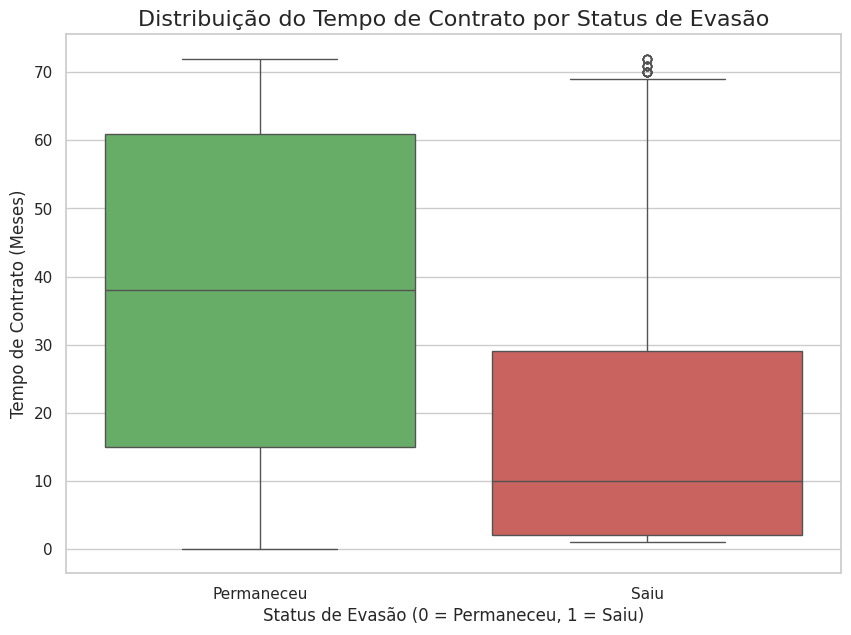

/tmp/ipython-input-1604820648.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Gasto_Total', data=df_tratado, palette=['#5cb85c', '#d9534f'])


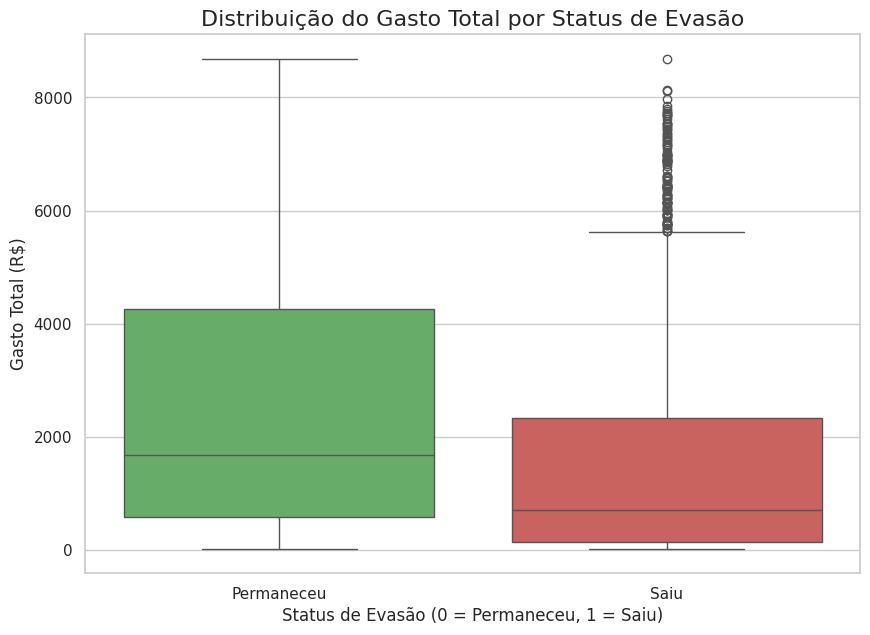

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# df j√° tem a coluna 'Churn' como 0 e 1.

# Definindo um estilo visual agrad√°vel
sns.set(style="whitegrid")

# --- 1. An√°lise: Tempo de Contrato vs. Evas√£o ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_tratado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribui√ß√£o do Tempo de Contrato por Status de Evas√£o', fontsize=16)
plt.xlabel('Status de Evas√£o (0 = Permaneceu, 1 = Saiu)', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu']) # R√≥tulos mais claros no eixo X
plt.show()

# --- 2. An√°lise: Gasto Total vs. Evas√£o ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Gasto_Total', data=df_tratado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribui√ß√£o do Gasto Total por Status de Evas√£o', fontsize=16)
plt.xlabel('Status de Evas√£o (0 = Permaneceu, 1 = Saiu)', fontsize=12)
plt.ylabel('Gasto Total (R$)', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu']) # R√≥tulos mais claros no eixo X
plt.show()

**An√°lise do Boxplot 1: Tempo de Contrato**

*Existe uma diferen√ßa dr√°stica e ineg√°vel entre os dois grupos.*

**- Clientes que Permaneceram (Verde):**

A caixa est√° muito alta. A linha do meio (mediana) mostra que metade desses clientes tem mais de 38 meses de contrato. Eles s√£o, em geral, clientes de longa data.

---

**- Clientes que Sa√≠ram (Vermelho):**

A caixa est√° esmagada na parte de baixo do gr√°fico. A mediana √© baix√≠ssima, em torno de 10 meses. Metade dos clientes que cancelam o fazem antes do d√©cimo m√™s.

---

**-Insight Principal:**

O churn √© um fen√¥meno que acontece predominantemente com clientes novos. Os primeiros meses s√£o o per√≠odo mais cr√≠tico para a reten√ß√£o. Se um cliente passa da marca de 30-40 meses, a chance de ele cancelar diminui drasticamente. Isso confirma visualmente a forte correla√ß√£o negativa que voc√™ encontrou.

**An√°lise do Boxplot 2: Gasto Total**

**- Clientes que Permaneceram (Verde):** A mediana do gasto total √© significativamente maior (em torno de R$1700). Ao longo de seu tempo com a empresa, eles geraram muito mais receita.

---

**- Clientes que Sa√≠ram (Vermelho):** A mediana do gasto total √© bem menor (em torno de R$700).

---

**- Insight Principal (e muito importante!):** Este gr√°fico resolve um aparente paradoxo. Lembre-se que um Gasto_Mensal alto tinha uma correla√ß√£o positiva com o churn. No entanto, o Gasto_Total √© muito menor para quem sai. O motivo √© exatamente o que vimos no primeiro gr√°fico: eles ficam por t√£o pouco tempo que n√£o conseguem acumular um gasto total elevado.

## Cria√ß√£o de Modelos Preditivos:

**Modelos escolhidos:**

- Regress√£o Log√≠stica: Um modelo cl√°ssico que requer dados padronizados. Servir√° como nosso baseline.

- Random Forest (Floresta Aleat√≥ria): Um modelo mais complexo e robusto que n√£o requer dados padronizados.

### Modelo 1: Regress√£o Log√≠stica (O Modelo Baseline Sens√≠vel √† Escala)

**Justificativa da Escolha:**

A Regress√£o Log√≠stica √© um dos algoritmos mais fundamentais para problemas de classifica√ß√£o. A escolha dela como nosso primeiro modelo √© estrat√©gica por tr√™s motivos:

- Simplicidade e Rapidez: √â um modelo computacionalmente leve e r√°pido de treinar.

- Excelente Baseline: Seu desempenho nos d√° um ponto de refer√™ncia s√≥lido. Qualquer modelo mais complexo que criarmos deve, no m√≠nimo, superar a Regress√£o Log√≠stica para justificar sua complexidade.

- Interpretabilidade: √â um modelo de "caixa branca", o que significa que podemos interpretar facilmente os coeficientes (pesos) que ele atribui a cada vari√°vel para entender o que influencia sua decis√£o.

---

**A Necessidade da Padroniza√ß√£o:**

A Regress√£o Log√≠stica funciona calculando uma soma ponderada das vari√°veis de entrada. Se as vari√°veis tiverem escalas muito diferentes (ex: Gasto_Total em milhares e Idoso em 0 ou 1), o modelo dar√° um peso desproporcional √† vari√°vel com a maior escala, simplesmente por causa da magnitude de seus valores, e n√£o por seu poder preditivo real.

In [23]:
from sklearn.linear_model import LogisticRegression

# 1. Inicializar o modelo
# Usamos random_state para garantir que os resultados sejam reproduz√≠veis
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Treinar o modelo com os dados de treino balanceados e padronizados
print("Iniciando o treinamento do modelo de Regress√£o Log√≠stica...")
log_reg.fit(X_train_scaled, y_train_balanced)
print("Modelo de Regress√£o Log√≠stica treinado com sucesso!")

Iniciando o treinamento do modelo de Regress√£o Log√≠stica...
Modelo de Regress√£o Log√≠stica treinado com sucesso!


---

### Modelo 2: Random Forest (O Modelo Robusto Baseado em √Årvore)

**Justificativa da Escolha:**

O Random Forest √© um dos modelos mais populares e eficazes para problemas de classifica√ß√£o como este.
Alto Desempenho: Geralmente, oferece uma precis√£o significativamente maior do que modelos lineares como a Regress√£o Log√≠stica.

- Robustez:

√â um modelo de conjunto (ensemble), o que significa que ele constr√≥i m√∫ltiplas √°rvores de decis√£o e combina seus resultados (uma "vota√ß√£o da floresta"). Isso o torna muito menos propenso a overfitting (quando o modelo decora os dados de treino em vez de aprender padr√µes gerais).

- Import√¢ncia das Vari√°veis:

Ele possui um recurso embutido (feature_importances_) que nos diz quais vari√°veis foram mais importantes para suas decis√µes, o que √© extremamente valioso para a an√°lise estrat√©gica.

---

- A (N√£o) Necessidade da Padroniza√ß√£o:

Modelos baseados em √°rvores, como o Random Forest, n√£o s√£o sens√≠veis √† escala dos dados. Eles tomam decis√µes fazendo uma s√©rie de perguntas sequenciais sobre uma √∫nica vari√°vel por vez, como: "O Tempo_Contrato do cliente √© maior que 12.5 meses?". Para essa pergunta, n√£o importa se o Gasto_Total est√° na casa dos milhares ou se Idoso √© 0 ou 1. O modelo simplesmente encontra o melhor "ponto de corte" para cada vari√°vel, independentemente de sua escala.

In [24]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inicializar o modelo
rf_clf = RandomForestClassifier(random_state=42)

# 2. Treinar o modelo com os mesmos dados de treino
print("\nIniciando o treinamento do modelo Random Forest...")
rf_clf.fit(X_train_scaled, y_train_balanced)
print("Modelo Random Forest treinado com sucesso!")


Iniciando o treinamento do modelo Random Forest...
Modelo Random Forest treinado com sucesso!


## **An√°lise Cr√≠tica dos Resultados (Interpretando os N√∫meros)**

--- Avalia√ß√£o do Modelo: Regress√£o Log√≠stica ---
                precision    recall  f1-score   support

Permaneceu (0)       0.87      0.80      0.83      1552
      Saiu (1)       0.54      0.67      0.60       561

      accuracy                           0.76      2113
     macro avg       0.71      0.73      0.71      2113
  weighted avg       0.78      0.76      0.77      2113


--- Avalia√ß√£o do Modelo: Random Forest ---
                precision    recall  f1-score   support

Permaneceu (0)       0.86      0.83      0.84      1552
      Saiu (1)       0.57      0.62      0.59       561

      accuracy                           0.77      2113
     macro avg       0.71      0.72      0.72      2113
  weighted avg       0.78      0.77      0.78      2113



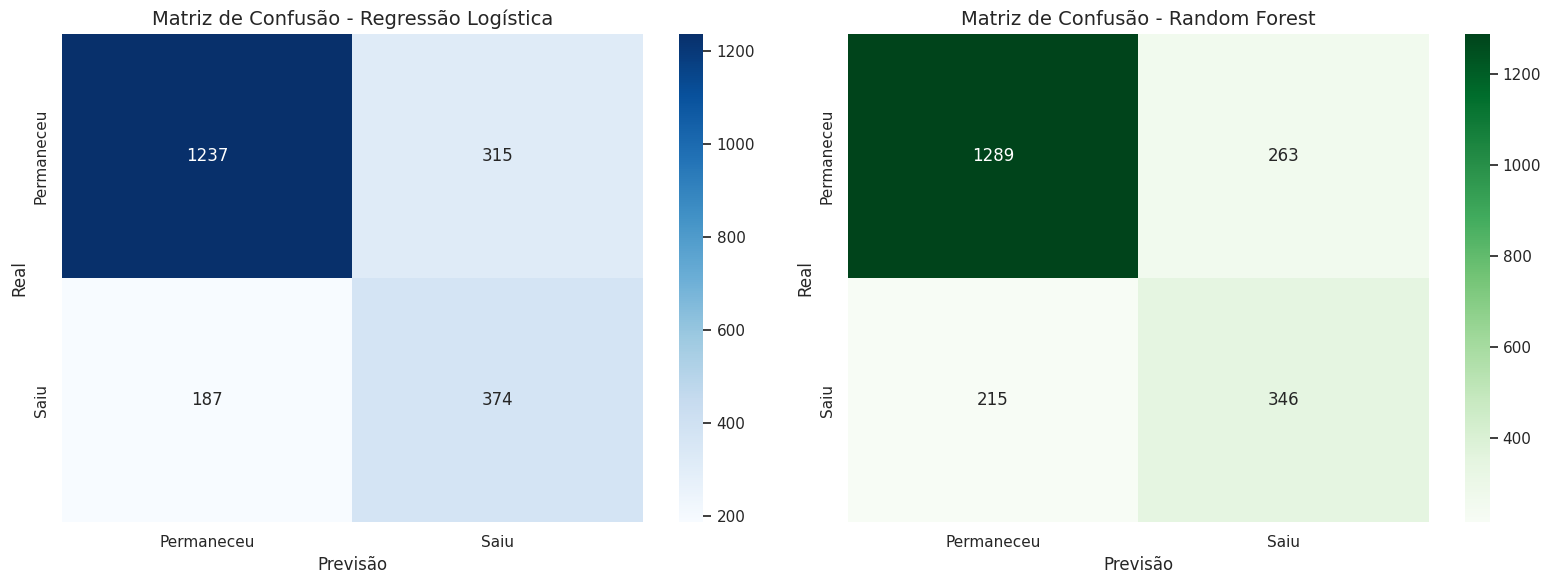

In [25]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Fazer as previs√µes nos dados de teste ---
# Estes s√£o dados que os modelos nunca viram antes.
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)

# --- 2. Avalia√ß√£o da Regress√£o Log√≠stica ---
print("--- Avalia√ß√£o do Modelo: Regress√£o Log√≠stica ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Matriz de Confus√£o para Regress√£o Log√≠stica
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# --- 3. Avalia√ß√£o do Random Forest ---
print("\n--- Avalia√ß√£o do Modelo: Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Matriz de Confus√£o para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)


# --- 4. Visualiza√ß√£o das Matrizes de Confus√£o ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz para Regress√£o Log√≠stica
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confus√£o - Regress√£o Log√≠stica', fontsize=14)
axes[0].set_xlabel('Previs√£o')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['Permaneceu', 'Saiu'])
axes[0].set_yticklabels(['Permaneceu', 'Saiu'])

# Matriz para Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confus√£o - Random Forest', fontsize=14)
axes[1].set_xlabel('Previs√£o')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['Permaneceu', 'Saiu'])
axes[1].set_yticklabels(['Permaneceu', 'Saiu'])

plt.tight_layout()
plt.show()

## **1. ‚úÖ An√°lise Geral**

**Regress√£o Log√≠stica:**
---

**- Verdadeiros Positivos (Saiu/Saiu):** 374 - 10/10. O modelo identificou corretamente 374 clientes que de fato cancelaram o servi√ßo.

**- Verdadeiros Negativos (Permaneceu/Permaneceu):** 1237 - 10/10. O modelo previu corretamente que 1237 clientes ficariam na base.

**- Falsos Positivos (Permaneceu/Saiu):** 315 - Este √© um erro - 03/10. O modelo achou que 315 clientes iriam sair, mas eles na verdade permaneceram. Isso poderia gerar custos de reten√ß√£o desnecess√°rios.

**- Falsos Negativos (Saiu/Permaneceu):** 187 - Este √© o erro mais perigoso para o neg√≥cio - 01/10. O modelo previu que 187 clientes ficariam, mas eles na verdade cancelaram. S√£o oportunidades de reten√ß√£o perdidas.

- Do classification_report, vemos que para a classe "Saiu (1)":

- Recall de 0.67: Significa que o modelo conseguiu encontrar 67% de todos os clientes que realmente cancelaram. De cada 3 clientes que cancelaram, ele encontrou 2.

- Precis√£o de 0.54: Significa que, de todos os clientes que o modelo marcou como "risco de sair", 54% deles realmente sa√≠ram.

---

**Random Forest:**
---

**- Verdadeiros Positivos (Saiu/Saiu):** 346 - Bom, mas identificou 28 clientes a menos que a Regress√£o Log√≠stica - 06/10.

**- Verdadeiros Negativos (Permaneceu/Permaneceu):** 1289 - Excelente, errou menos ao classificar quem ficaria - 08/10.

**- Falsos Positivos (Permaneceu/Saiu):** 263 - Um erro menor que o da Regress√£o Log√≠stica. Gerou menos "alarmes falsos" - 08/10.

**- Falsos Negativos (Saiu/Permaneceu):** 215 - Este √© o ponto fraco. Deixou de identificar 215 clientes que cancelaram, 28 a mais que o outro modelo - 01/10.

- Do classification_report, vemos que para a classe "Saiu (1)":

- Recall de 0.62: Conseguiu encontrar 62% dos clientes que realmente cancelaram. Um pouco inferior √† Regress√£o Log√≠stica.

- Precis√£o de 0.57: Um pouco melhor. De todos que ele marcou como "risco", 57% realmente sa√≠ram.


## **2. ‚úÖ Qual modelo teve o melhor desempenho?**

Os F1-scores s√£o quase id√™nticos (0.60 vs 0.59), o que indica que a performance geral √© muito similar. A decis√£o est√° no trade-off entre Precis√£o e Recall.

**- Caso de Uso 1: Maximizar a Reten√ß√£o (Priorizar o Recall)**

Se o objetivo principal da Telecom X √© **n√£o perder nenhuma oportunidade de reter um cliente**, ent√£o a **Regress√£o Log√≠stica √© a melhor escolha**. Ela tem um Recall maior (67%), o que significa que ela **"pesca" um n√∫mero maior de clientes que est√£o prestes a sair**. O custo disso √© contatar mais pessoas que n√£o iriam sair (menor precis√£o).

---

**- Caso de Uso 2: Otimizar os Custos de Reten√ß√£o (Priorizar a Precis√£o)**

Se as a√ß√µes de reten√ß√£o s√£o muito caras (ex: oferecer grandes descontos) e a **empresa quer ter a maior certeza poss√≠vel antes de agir**, ent√£o o **Random Forest √© marginalmente melhor**. Ele tem uma **Precis√£o maior** (57%), garantindo que os recursos sejam gastos em clientes com uma probabilidade um pouco maior de realmente cancelar.

## **3. ‚úÖ An√°lise de Overfitting ou Underfitting**

- Random Forest:

√â muito comum que modelos de Random Forest, sem ajuste de par√¢metros, apresentem um desempenho quase perfeito nos dados de treino. O fato de o desempenho no teste ser bom, mas n√£o espetacular (e ligeiramente inferior ao modelo mais simples no Recall), √© um forte indicativo de um leve overfitting. Ele aprendeu t√£o bem os dados de treino (incluindo os sint√©ticos do SMOTE) que perdeu um pouco da capacidade de generalizar.

*Ajuste sugerido: Limitar a profundidade das √°rvores (max_depth) para simplificar o modelo.*  

---

- Regress√£o Log√≠stica:

Como √© um modelo mais simples, √© menos propenso a overfitting. O desempenho s√≥lido e consistente no teste sugere que ele capturou bem as tend√™ncias principais dos dados sem "decor√°-los". Pode-se dizer que ele tem um bom ajuste (good fit) para este problema.

## **4. ‚úÖ Recomenda√ß√£o**

Para um problema de churn, o custo de perder um cliente (Falso Negativo) √© quase sempre maior do que o custo de tentar reter um cliente que n√£o iria sair (Falso Positivo). Portanto, o modelo de **Regress√£o Log√≠stica, com seu Recall superior, √© o que entrega mais valor para o neg√≥cio neste caso.**

## **Visualiza√ß√£o das An√°lises**

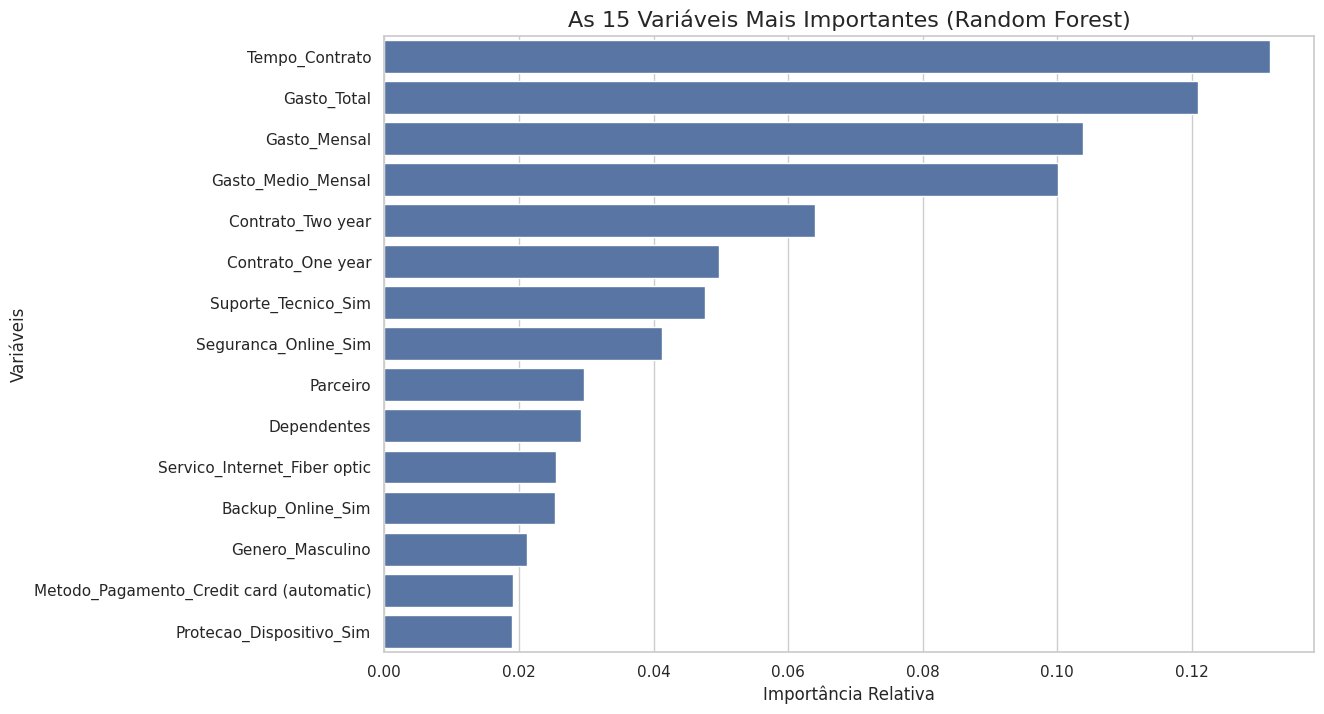

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'rf_clf' √© seu modelo Random Forest treinado e 'X' √© seu dataframe antes da padroniza√ß√£o (para pegar os nomes das colunas)

# 1. Extrair a import√¢ncia das vari√°veis
importances = rf_clf.feature_importances_

# 2. Criar um DataFrame para visualiza√ß√£o
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 3. Visualizar as 15 vari√°veis mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index)
plt.title('As 15 Vari√°veis Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Import√¢ncia Relativa', fontsize=12)
plt.ylabel('Vari√°veis', fontsize=12)
plt.show()

**O Conceito √©:**

O modelo constr√≥i centenas de √°rvores de decis√£o. Cada vez que ele divide os dados, ele escolhe a vari√°vel que melhor separa os clientes que "sa√≠ram" dos que "permaneceram". A "import√¢ncia" de uma vari√°vel √©, de forma simplificada, a m√©dia de qu√£o √∫til ela foi em todas essas decis√µes.

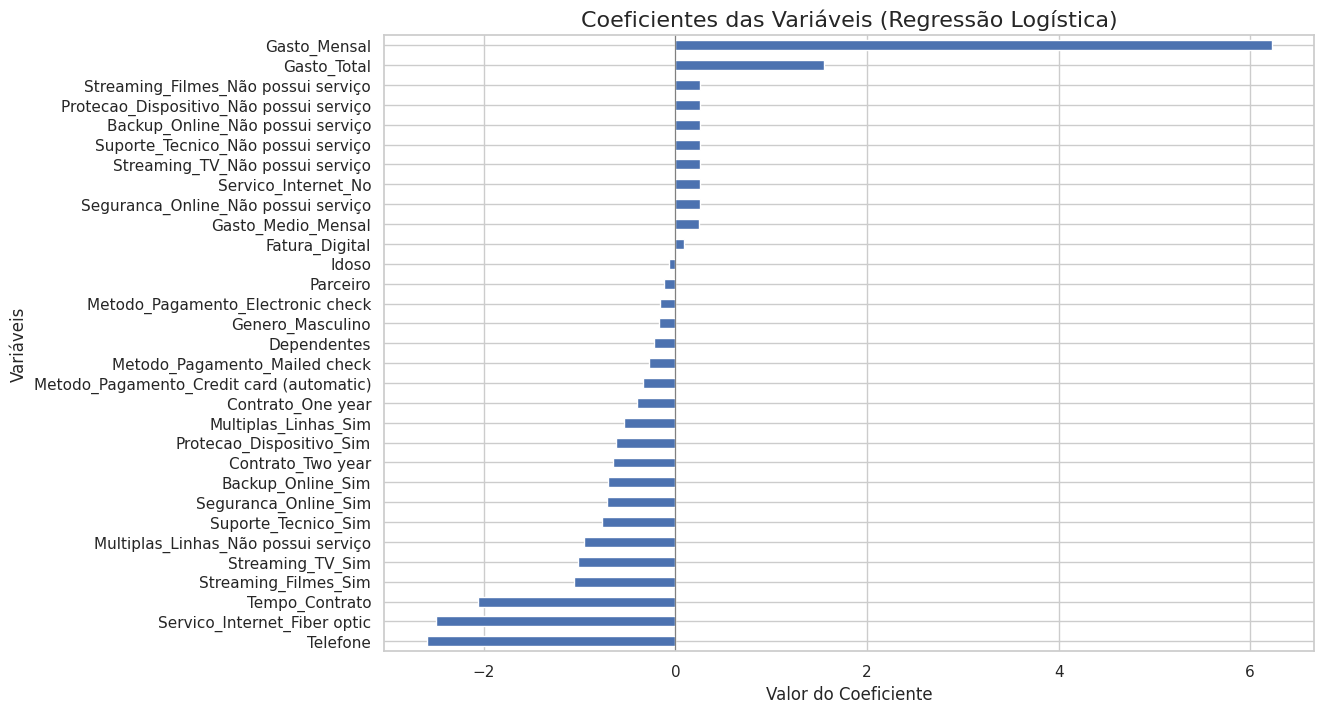

In [28]:
# 1. Extrair os coeficientes
coefficients = log_reg.coef_[0]

# 2. Criar um DataFrame para visualiza√ß√£o
feature_coefficients = pd.Series(coefficients, index=X.columns).sort_values()

# 3. Visualizar os maiores pesos (positivos e negativos)
plt.figure(figsize=(12, 8))
feature_coefficients.plot(kind='barh')
plt.title('Coeficientes das Vari√°veis (Regress√£o Log√≠stica)', fontsize=16)
plt.xlabel('Valor do Coeficiente', fontsize=12)
plt.ylabel('Vari√°veis', fontsize=12)
plt.axvline(0, color='grey', linewidth=0.8) # Linha no zero para separar
plt.show()

**O Conceito:**

O modelo atribui um "peso" (coeficiente) a cada vari√°vel.

- Peso Positivo: Aumenta a probabilidade de churn.
- Peso Negativo: Diminui a probabilidade de churn.

# **Resultado Final:**

Embora ambos os modelos, **Regress√£o Log√≠stica** e **Random Forest**, tenham apresentado um desempenho geral muito semelhante (F1-score de 0.60 e 0.59, respectivamente), o modelo de Regress√£o Log√≠stica foi selecionado como o de melhor desempenho para o objetivo estrat√©gico da Telecom X.


A raz√£o para esta escolha est√° no **Recall superior** (67% vs 62%) para a classe de clientes que cancelaram ('Saiu'). Em um cen√°rio de previs√£o de churn, √© mais custoso para a empresa n√£o identificar um cliente que est√° prestes a sair (um Falso Negativo) do que contatar um cliente que n√£o iria sair (um Falso Positivo). O Recall mais alto da Regress√£o Log√≠stica garante que a empresa consiga identificar e agir sobre uma porcentagem maior de clientes em risco real, maximizando as oportunidades de reten√ß√£o."

## *Fontes e Refer√™ncias para os Conceitos Aplicados*

**1. Pr√©-processamento de Dados (Geral)
Conceito: A necessidade de preparar e limpar os dados antes de alimentar os modelos de machine learning.**


*Fonte (Documenta√ß√£o): Scikit-learn - Preprocessing data*

- Descri√ß√£o: A documenta√ß√£o oficial da biblioteca Scikit-learn, que √© a principal refer√™ncia para a implementa√ß√£o pr√°tica. Explica a import√¢ncia da padroniza√ß√£o, normaliza√ß√£o e encoding.

---

**2. Balanceamento de Classes com SMOTE
Conceito: T√©cnica de oversampling que cria amostras sint√©ticas da classe minorit√°ria para corrigir o desequil√≠brio dos dados de treino.**

*Fonte (Documenta√ß√£o): Imbalanced-learn - SMOTE*

- Descri√ß√£o: A documenta√ß√£o oficial da biblioteca imbalanced-learn, mostrando como usar o SMOTE e seus par√¢metros.

---

*Fonte (Artigo Original): "SMOTE: Synthetic Minority Over-sampling Technique" por N. V. Chawla et al.*

- Descri√ß√£o: Este √© o artigo cient√≠fico original que prop√¥s o m√©todo. Citar o artigo acad√™mico demonstra uma profundidade maior na pesquisa.

*Fonte (Explica√ß√£o Intuitiva): Towards Data Science - "SMOTE Explained for Noobs"*

-Descri√ß√£o: Um artigo que explica de forma clara e com exemplos como o algoritmo SMOTE funciona internamente, ideal para entender a l√≥gica por tr√°s da cria√ß√£o dos dados sint√©ticos.

---

**3. Divis√£o em Dados de Treino e Teste (train_test_split)
Conceito: A pr√°tica fundamental de dividir o conjunto de dados para treinar o modelo em uma parte e avali√°-lo de forma imparcial em outra, que ele nunca viu antes.*

*Fonte (Documenta√ß√£o): Scikit-learn - train_test_split*

- Descri√ß√£o: A documenta√ß√£o da fun√ß√£o espec√≠fica, explicando seus par√¢metros como test_size, random_state e, crucialmente, stratify, que usamos para manter a propor√ß√£o de classes.

---

**4. Padroniza√ß√£o de Dados (StandardScaler)
Conceito: Transformar as vari√°veis para que tenham m√©dia 0 e desvio padr√£o 1, colocando-as em uma mesma escala.**

*Fonte (Documenta√ß√£o): Scikit-learn - StandardScaler*

- Descri√ß√£o: A documenta√ß√£o da ferramenta que utilizamos. Explica a diferen√ßa entre os m√©todos .fit(), .transform() e .fit_transform(), que √© crucial para evitar o vazamento de dados (data leakage).

---

**5. Regress√£o Log√≠stica
Conceito: Um modelo estat√≠stico usado para classifica√ß√£o bin√°ria que calcula a probabilidade de um resultado.**

*Fonte (Documenta√ß√£o): Scikit-learn - LogisticRegression*

- Descri√ß√£o: Refer√™ncia pr√°tica para a implementa√ß√£o do modelo em Python.

* Fonte (Explica√ß√£o Visual e Intuitiva): StatQuest with Josh Starmer - Logistic Regression (YouTube)*

- Descri√ß√£o: V√≠deo que explica de forma extremamente clara e visual a matem√°tica e a intui√ß√£o por tr√°s da Regress√£o Log√≠stica, sem ser excessivamente t√©cnico. StatQuest √© uma refer√™ncia fant√°stica para entender conceitos de ML.

---

**6. Random Forest (Floresta Aleat√≥ria)
Conceito: Um modelo de ensemble learning que constr√≥i m√∫ltiplas √°rvores de decis√£o e combina seus resultados para obter uma predi√ß√£o mais precisa e est√°vel.**

*Fonte (Documenta√ß√£o): Scikit-learn - RandomForestClassifier*

- Descri√ß√£o: Refer√™ncia de implementa√ß√£o, com detalhes sobre os hiperpar√¢metros mais importantes, como o n√∫mero de √°rvores (n_estimators).

*Fonte (Explica√ß√£o Visual e Intuitiva): StatQuest with Josh Starmer - Random Forests (YouTube)*

- Descri√ß√£o: Assim como o de Regress√£o Log√≠stica, este v√≠deo explica brilhantemente como o Random Forest funciona, incluindo os conceitos de bagging e sele√ß√£o de features.*